In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
DataEco = pd.read_csv('ecommerce_sales_analysis.csv')
sales = DataEco.drop(["product_id",'product_name'],axis=1)
sales.columns=["Categoria","Preço","Review","Review_qtd","Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro","Novembro","Dezembro"]

sales['Rendimento'] = sales.iloc[:,2:14].sum(axis=1) * sales['Preço']

sales['Total vendas'] = sales.iloc[:,4:16].sum(axis=1)

display(sales.head(10))


,Categoria,Preço,Review,Review_qtd,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Rendimento,Total vendas
0,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,1074179.680,6421
1,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,2762379.920,6027
2,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,1869209.590,5580
3,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,1689281.906,5022
4,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,435095.376,6094
5,Toys,82.22,3.6,270,834,288,38,422,329,245,614,979,851,630,738,485,452505.992,6453
6,Electronics,33.75,3.8,632,565,140,539,244,188,700,896,965,447,66,32,516,181770.750,5298
7,Electronics,433.76,4.4,906,905,83,48,926,94,555,280,102,202,753,376,445,2107379.584,4769
8,Electronics,302.55,2.0,848,809,693,419,106,616,85,42,992,696,298,213,708,1696095.300,5677
9,Clothing,355.50,3.0,400,319,390,636,87,7,555,485,566,632,462,561,179,1614681.000,4879


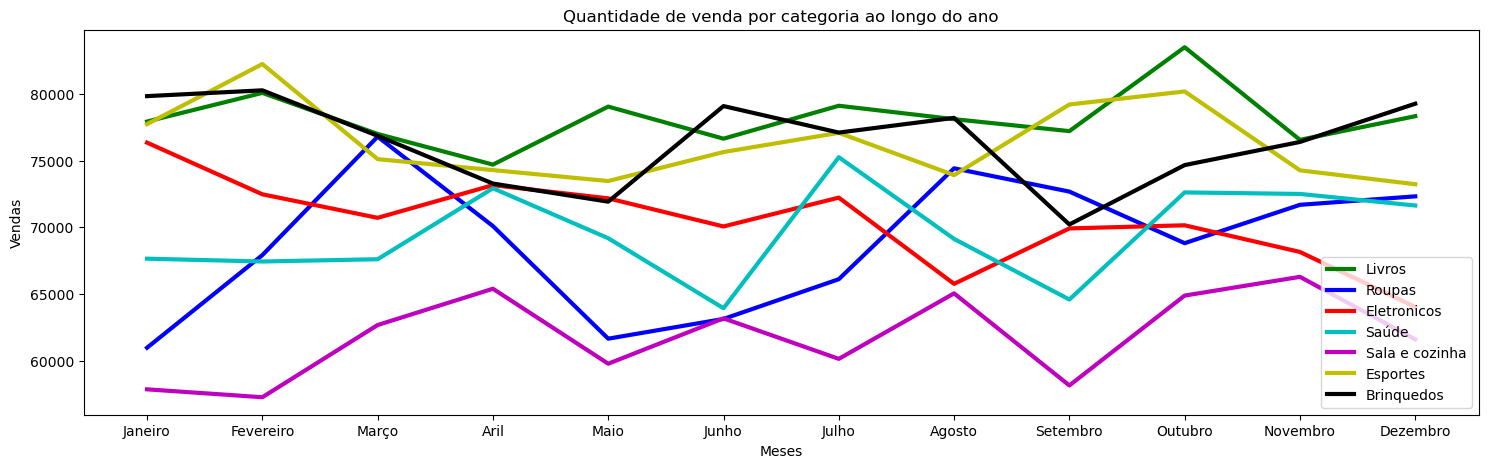

In [3]:
sales_category=sales.groupby('Categoria')
sales_Books = sales_category.get_group('Books')
sales_Clothing = sales_category.get_group('Clothing')
sales_Eletronics = sales_category.get_group('Electronics')
sales_Health = sales_category.get_group('Health')
sales_Hk = sales_category.get_group('Home & Kitchen')
sales_Sports = sales_category.get_group('Sports')
sales_Toys = sales_category.get_group('Toys')

months = ["Janeiro","Fevereiro","Março","Aril","Maio","Junho","Julho","Agosto","Setembro","Outubro","Novembro","Dezembro"]
categorias = ["Roupas","Briquedos","Esportes","Eletronicos","Saúde","Sala e cozinha","Livros"]

books = sales_Books.iloc[:,4:16].sum()
clothes = sales_Clothing.iloc[:,4:16].sum()
electronics = sales_Eletronics.iloc[:,4:16].sum()
health = sales_Health.iloc[:,4:16].sum()
homekitchen = sales_Hk.iloc[:,4:16].sum()
sports = sales_Sports.iloc[:,4:16].sum()
toys = sales_Toys.iloc[:,4:16].sum()


plt.figure(figsize=(18,5))
plt.plot(months,books,label='Livros',linewidth=3.0,color='g')
plt.plot(months,clothes,label='Roupas',linewidth=3.0,color='b')
plt.plot(months,electronics,label='Eletronicos',linewidth=3.0,color='r')
plt.plot(months,health,label='Saúde',linewidth=3.0,color='c')
plt.plot(months,homekitchen,label='Sala e cozinha',linewidth=3.0,color='m')
plt.plot(months,sports,label='Esportes',linewidth=3.0,color='y')
plt.plot(months,toys,label='Brinquedos',linewidth=3.0,color='k')
plt.xlabel("Meses")
plt.ylabel("Vendas")
plt.title("Quantidade de venda por categoria ao longo do ano")
plt.legend()
plt.show()

,Categorias,Total vendas
0,Livros,938229
1,Roupas,826536
2,Brinquedos,917101
3,Esportes,916371
4,Eletronicos,845120
5,Saúde,834414
6,Sala e cozinha,742141


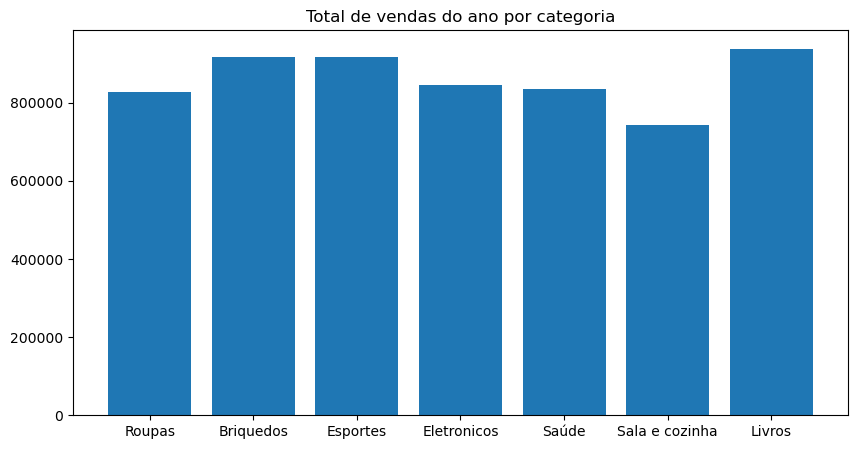

In [12]:
sales_Clothing['Total vendas']

plt.figure(figsize=(10,5))
total_vendas_categorias = [sales_Clothing['Total vendas'].sum(),sales_Toys['Total vendas'].sum() ,sales_Sports['Total vendas'].sum(),sales_Eletronics['Total vendas'].sum(),sales_Health['Total vendas'].sum(),sales_Hk['Total vendas'].sum(),sales_Books['Total vendas'].sum() ]
dados = {
    'Categorias': ['Livros', 'Roupas', 'Brinquedos','Esportes','Eletronicos','Saúde','Sala e cozinha'],
    'Total vendas': [sales_Books['Total vendas'].sum(), sales_Clothing['Total vendas'].sum(), sales_Toys['Total vendas'].sum(),sales_Sports['Total vendas'].sum(), sales_Eletronics['Total vendas'].sum(), sales_Health['Total vendas'].sum(),sales_Hk['Total vendas'].sum()],

}
plt.bar(categorias,total_vendas_categorias)
total_vendas_table =  pd.DataFrame(dados)
display(total_vendas_table)
plt.title("Total de vendas do ano por categoria")
plt.show()

171506928.458


(0.0, 250000000.0)

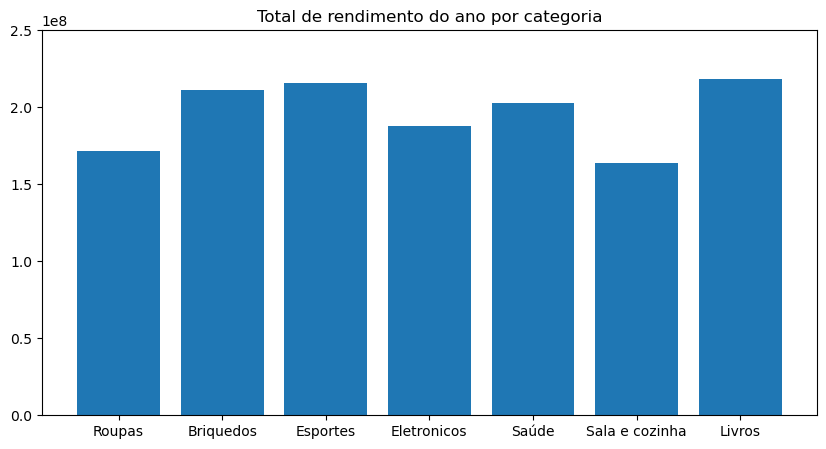

In [5]:

y = [sales_Clothing['Rendimento'].sum(),sales_Toys['Rendimento'].sum(),sales_Sports['Rendimento'].sum(),sales_Eletronics['Rendimento'].sum(),sales_Health['Rendimento'].sum(),sales_Hk['Rendimento'].sum(),sales_Books['Rendimento'].sum() ]
plt.figure(figsize=(10,5))
print(sales_Clothing['Rendimento'].sum())
plt.title("Total de rendimento do ano por categoria")
plt.bar(categorias,y)
plt.ylim(0,250000000)

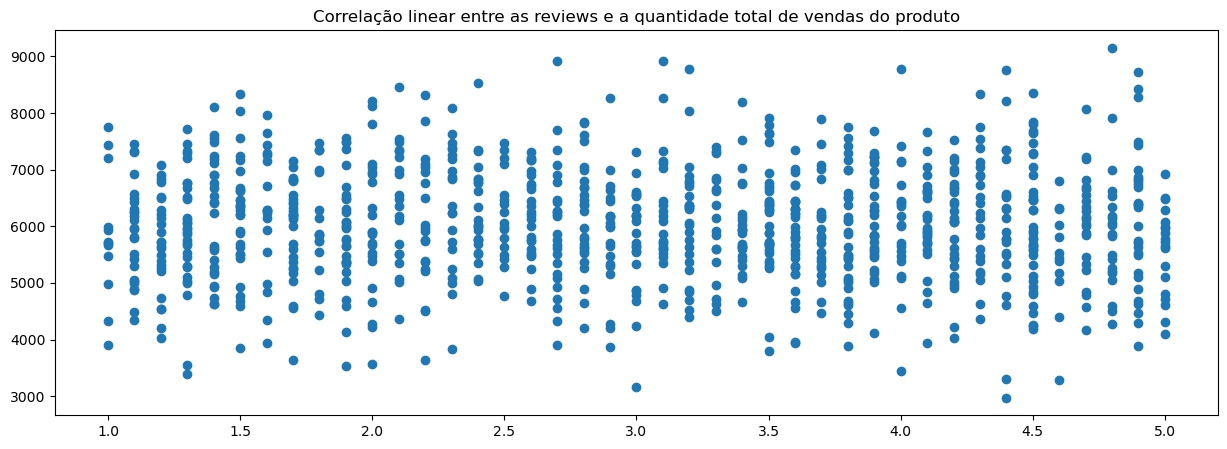

In [13]:
plt.figure(figsize=(15,5))
plt.title("Correlação linear entre as reviews e a quantidade total de vendas do produto")

plt.scatter(sales['Review'],sales['Total vendas'])

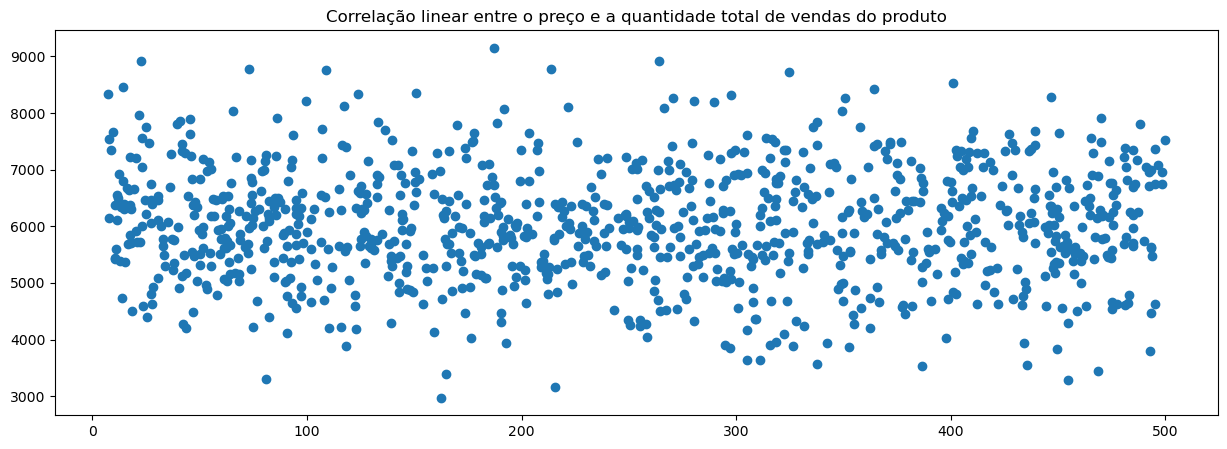

In [14]:
plt.figure(figsize=(15,5))
plt.title('Correlação linear entre o preço e a quantidade total de vendas do produto')
plt.scatter(sales['Preço'],sales['Total vendas'])